In [1]:
# --data description
# this data is of 'Titanic Dataset Analysis'
# link to the data: https://www.kaggle.com/cities/titanic123
# here the basic goal is to make classification models

#### import necessary libraries

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None) # for diplaying all columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for advanced plotting
%config InlineBackend.figure_formats = ['svg'] # for clear inline plots
import warnings
warnings.filterwarnings('ignore') # stop displaying warnings

# for printing colored text as headings
from termcolor import colored 
def cm(txt):
    formatted_txt = colored('{}'.format(txt), 'green', attrs=['bold', 'underline'])
    print(formatted_txt)

#### load dataframe to python environment

In [3]:
df = pd.read_csv('data.csv')
display(df[0 : 5])

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### checking the summary of data

In [4]:
# get information of data
cm('basic information summary of data')
information = df.info() # --displays automatically

# get basic statistics of the data
description = df.describe()
cm('basic statistical summery of data')
display(description)

basic information summary of data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
basic statistical summery of data


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
# i am gonna preprocess the data in analysis part.

### analysis

#### preprocessing

##### -- dropping the columns where standard deviation = 0

In [6]:
# there is no columns to drop where standard deviation = 0

##### -- removing and replacing the nan values

which columns contains how many nan values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

histogram for viewing distribution of age


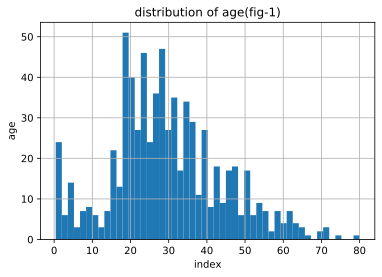

cleaned data frame dealt with nan


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [7]:
# checking which columns contains how many nan values
df_nan = df.isnull().sum()
cm('which columns contains how many nan values')
display(df_nan)

# as cabin column contain a lot of nan values we are gonna drop that column, hence
df_clean = df.drop(['Cabin'], axis = 1)

# age column contains 177 nan values so we need to replace them.
# getting distribution of age column
age = df_clean['Age']
# vizualizing the distribution of age column

# plt.figure(figsize = (2, 3), dpi = 100)
# plt.subplots_adjust(wspace = 0.7, hspace = 0.5)

cm('histogram for viewing distribution of age')
# plt.figure(figsize = (5, 3), dpi = 100)
color = 'black'
plt.hist(age, bins = 50)
plt.title('distribution of age(fig-1)')
plt.xlabel( 'index', color = color)
plt.ylabel('age')
plt.tick_params(axis = 'x', labelcolor = color)
plt.grid()
plt.show()

# as this column doesn't contain any extreme value we are gonna replace nan by mean i.e 29.699118
df_clean['Age'] = df_clean['Age'].fillna(29.699118)

# 'embarked' column contains only 2 nan, we are gonna remove those two rows
df_clean = df_clean.dropna(axis=0, how='any')

cm('cleaned data frame dealt with nan')
display(df_clean[0 : 5])

##### -- removing and replacing outliers for each columns

In [8]:
# this step is necessary for regression kind of analysis. however most of the cases this is less required for
# classification.

##### -- replacing categorical values to numeric

In [9]:
# --replacing sex
# getting how many unique values sex column contains
sex = df_clean['Sex']
sex_uniq = sex.unique()
cm('unique values of different categorical columns')
display(sex_uniq)
# replacing unique value with unique no. i.e 0, 1, 2...
df_clean['Sex'] = df_clean['Sex'].replace(['male', 'female'], [0, 1])

# --replacing embarked
embarked = df_clean['Embarked']
embarked_uniq = embarked.unique()
display(embarked_uniq)
# replacing unique value with unique no. i.e 0, 1, 2...
df_clean['Embarked'] = df_clean['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])

cm('cleaned data frame with categorical valees replaced to numeric')
display(df_clean[0 : 5])      

unique values of different categorical columns


array(['male', 'female'], dtype=object)

array(['S', 'C', 'Q'], dtype=object)

cleaned data frame with categorical valees replaced to numeric


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         0  
1          PC 17599  71.2833         1  
2  STON/O2. 3101282   7.9250         0  
3            113803  53.1000         0  
4            373450   8.0500         0

#### *** problem statement - making a model to classify whether a person will 'survive' in titanic(similar kind of) diaster.

#### bring data to sklearn model format i.e  x = [[x1, x2, x3...]], y = [y1, y2, y3...]

In [10]:
# --dropping the nominal data
df_clean = df_clean.drop(['Name', 'Ticket'], axis = 1)
cm('data frame with nominal columns dropped')
display(df_clean[0 : 5])

# bringing the cleaned data frame to sklearn model format
# dependent column
y = df_clean.iloc[:, 1] 
# independent columns
x = df_clean.iloc[:, 2 : 9]

cm('labels')
display(y[0 : 5])
cm('featers')
display(x[0 : 5])

data frame with nominal columns dropped


PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500         0
1            2         1       1    1  38.0      1      0  71.2833         1
2            3         1       3    1  26.0      0      0   7.9250         0
3            4         1       1    1  35.0      1      0  53.1000         0
4            5         0       3    0  35.0      0      0   8.0500         0

labels


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

featers


Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0

### feature selection

#### select features responsible for classification based on survival

which feater is how much important


array([0.10588904, 0.28702801, 0.24846309, 0.04766005, 0.04140643,
       0.23776541, 0.03178797])

independent featers


array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
      dtype=object)

vizualization of which featers is how much important


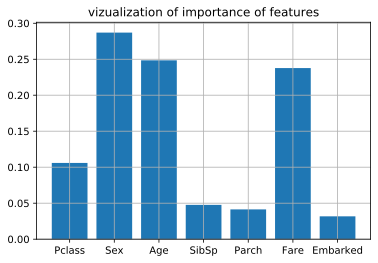

In [11]:
# for this logs of odds ration is taken into account, some statistical tests(ex: chi-square test) to get values,
# correlation analysis is performed.
# for simplicity i am just using sklear model importance to select features

# --step_1: for this featers are ranked based on importance for classifying the survival
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)

cm('which feater is how much important')
display(model.feature_importances_)

cm('independent featers')
index = np.array(x.columns)
display(index)

# vizualizing this
cm('vizualization of which featers is how much important')
plt.bar(index, model.feature_importances_)
plt.title('vizualization of importance of features')
plt.grid()
plt.show()

# to keep things simple i am not gonna perform up to very depth 
# i am taking all the featers

# ********************************************************************
# ** taking only required features(refer to the tuning of the models.)
# x = x[['Sex', 'Age']]
# ********************************************************************

#### pricipal component analysis

In [12]:
from sklearn.decomposition import PCA
model = PCA()
fit = model.fit(x)
cm('model summery')
print(fit)

cm('model results')
print('loading scores for pcs:', model.components_[0:3]) # get loading score for each PC
print('\neigen values of components:', model.explained_variance_) # get eigen value of each PC

# vizualization of eigen values
plt.bar([i for i in range(len(model.explained_variance_ - 1))], model.explained_variance_)
plt.title('vizualization of eigen values')
plt.xlabel('index')
plt.ylabel('eigen value')
plt.grid()
plt.show()

# from the above figure we can take only pc1 to carry out the classificaion analysis
# how ever for learning perpose i am not gonna use it for futher processes

model summery
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
model results
loading scores for pcs: [[-9.23567961e-03  1.72240479e-03  2.47889942e-02  3.53802296e-03
   3.51034110e-03  9.99635804e-01  8.12240237e-04]
 [-1.79540066e-02 -3.96538584e-03  9.99215409e-01 -2.13728820e-02
  -1.25591133e-02 -2.48180098e-02  1.76387779e-04]
 [ 1.21376320e-01  5.13066837e-02  2.66991056e-02  8.98059638e-01
   4.13576564e-01 -4.20634464e-03 -6.59408023e-02]]

eigen values of components: [2.47153898e+03 1.66920601e+02 1.26494298e+00 4.76142596e-01
 4.57755457e-01 3.71539157e-01 1.88986967e-01]


#### making a model for classifying the passangers based on survival.

##### -- splitting data to train test split

In [13]:
cm('the features')
display(x[0 : 5])
cm('the labels')
display(y[0 : 5])

# --splitting data to train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, shuffle = True)
cm('length of x_train, y_train, x_test, y_test to know the split')
print(len(x_train), len(y_train), len(x_test), len(y_test))

the features


Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0

the labels


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

length of x_train, y_train, x_test, y_test to know the split
622 622 267 267


### logistic regression

**logistic regression**
model summary
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model outputs

model coefficients: [[-1.08136394  2.58410243 -0.03663017 -0.2369544  -0.03585557  0.00312653
   0.23785825]]

model intercept: [1.94708049]

probabilities:  [[0.83649412 0.16350588]
 [0.27838413 0.72161587]
 [0.75461371 0.24538629]
 [0.20767314 0.79232686]
 [0.53473345 0.46526655]]

predictions: [0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0]
y_test:      [0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1]

overall accuracy:  0.797752808988764

confusion matrix: 
 [[142  20]
 [ 34  71]]


true positive: 142
false positive: 20
false negative: 34
true negative: 71

sensitivity or recall: 0.8068181818181818
precission: 0.8765432098765432
specificity: 0.7802197802197802
true positive rate: 0.8068181818181818
false positive rate: 0.21978021978021978

roc prameters:
false positive rate: [0.         0.         0.         0.00617284 0.00617284]
true positive rate: [0.         0.00952381 0.0952381  0.0952381  0.2       ]
threshold: [1.98214459 0.98214459 0.9408531  0.93698085 0.87643127]


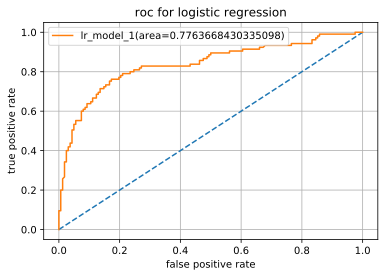


loss for trainning: 6.774556106817256
loss for testing: 0.4709722867007366


In [14]:
cm('**logistic regression**')

# building the classification model(logistic regression)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
fit = model.fit(x_train, y_train)
cm('model summary')
print(fit)

cm('model outputs')
print('\nmodel coefficients:', model.coef_) # print coefficient
print('\nmodel intercept:', model.intercept_) # print intercept

probabilities_lr = model.predict_proba(x_test) # probabilities_lr => probabilities for logistic regression
print('\nprobabilities: ', probabilities_lr[0 : 5])

predictions = model.predict(x_test)
print('\npredictions:', np.array(predictions[0 : 30]).astype(int))
print('y_test:     ', np.array(y_test[0 : 30]).astype(int))

# evaluating model on test data
accuracy = model.score(x_test, y_test)
print('\noverall accuracy: ',accuracy)

# model's confusion matrix
# importing confusuin matrix
from sklearn.metrics import confusion_matrix

confusion_mtrx = confusion_matrix(y_test, predictions)
print('\nconfusion matrix: \n', confusion_mtrx)

confusion_mtrx_norm = confusion_mtrx/confusion_mtrx.sum(axis=1).reshape(-1, 1)

# vizualization of confusion matrix
plt.figure(figsize=(4, 2.5))
sns.heatmap(confusion_mtrx_norm, annot=True, fmt='g', cmap='YlGnBu')
plt.title('vizualization of confusion matrix')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.tight_layout()
plt.show()

# calculate confusion matrix attributes
# taking 0 in account
tp = confusion_mtrx[0][0]
fp = confusion_mtrx[0][1]
fn = confusion_mtrx[1][0]
tn = confusion_mtrx[1][1]
print('true positive:', tp)
print('false positive:', fp)
print('false negative:', fn)
print('true negative:', tn)

print('\nsensitivity or recall:', tp/(tp+fn))
print('precission:', tp/(tp+fp))
print('specificity:', tn/(fp+tn))
print('true positive rate:', tp/(tp+fn))
print('false positive rate:', fp/(fp+tn))

# ploting roc(receiver operating characteristic)
from sklearn.metrics import roc_auc_score
from sklearn.metrics  import roc_curve

roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, threshold = roc_curve(y_test, probabilities_lr[:, 1])
print('\nroc prameters:')
print('false positive rate:', fpr[0 : 5])
print('true positive rate:', tpr[0 : 5])
print('threshold:', threshold[0 : 5])

plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr, tpr, label='lr_model_1(area={})'.format(roc_auc))
plt.title('roc for logistic regression')
plt.xlabel('false positive rate'); plt.ylabel('true positive rate')
plt.legend()
plt.grid()
plt.show()

# calculation of loss 
from sklearn.metrics import log_loss
# loss on training
log_ls_trn = log_loss(y_train, model.predict(x_train))
print('\nloss for trainning:', log_ls_trn)

# loss on testing
log_ls_tst = log_loss(y_test, probabilities_lr)
print('loss for testing:', log_ls_tst)

#### hyper parameter tunning for logistic regression

In [15]:
# tunning 'c' parameter, optimization parameters like 'learning rate', 'type of gradient descent' etc.

### decission tree

**decision tree**
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

probabilities:  [[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]

predictions: [0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1]
y_test:      [0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1]

accuracy:  0.7865168539325843

confusion matrix: 
 [[138  24]
 [ 33  72]]


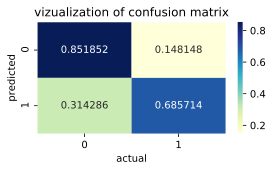

true positive: 138
false positive: 24
false negative: 33
true negative: 72

sensitivity or recall: 0.8070175438596491
precission: 0.8518518518518519
specificity: 0.75
true positive rate: 0.8070175438596491
false positive rate: 0.25

roc prameters:
false positive rate: [0.         0.14197531 0.14814815 0.16049383 0.16666667]
true positive rate: [0.         0.65714286 0.68571429 0.6952381  0.7047619 ]
threshold: [2.         1.         0.83333333 0.5        0.33333333]


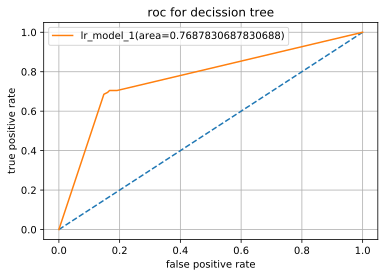

In [22]:
cm('**decision tree**')

# building the classification model(decission tree)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
fit = model.fit(x_train, y_train)
print(fit)
print()

probabilities_dt = model.predict_proba(x_test) # probabilities_dt => probabilities for decission tree
print('probabilities: ', probabilities_dt[0 : 5])
print()

predictions = model.predict(x_test)
print('predictions:', np.array(predictions[0 : 30]).astype(int))
print('y_test:     ', np.array(y_test[0 : 30]).astype(int))
print()

# --evaluating model on test data
accuracy = model.score(x_test, y_test)
print('accuracy: ',accuracy)

# model's confusion matrix
# importing confusuin matrix
from sklearn.metrics import confusion_matrix

confusion_mtrx = confusion_matrix(y_test, predictions)
print('\nconfusion matrix: \n', confusion_mtrx)

confusion_mtrx_norm = confusion_mtrx/confusion_mtrx.sum(axis=1).reshape(-1, 1)

# vizualization of confusion matrix
plt.figure(figsize=(4, 2.5))
sns.heatmap(confusion_mtrx_norm, annot=True, fmt='g', cmap='YlGnBu')
plt.title('vizualization of confusion matrix')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.tight_layout()
plt.show()

# calculate confusion matrix attributes
# taking 0 in account
tp = confusion_mtrx[0][0]
fp = confusion_mtrx[0][1]
fn = confusion_mtrx[1][0]
tn = confusion_mtrx[1][1]
print('true positive:', tp)
print('false positive:', fp)
print('false negative:', fn)
print('true negative:', tn)

print('\nsensitivity or recall:', tp/(tp+fn))
print('precission:', tp/(tp+fp))
print('specificity:', tn/(fp+tn))
print('true positive rate:', tp/(tp+fn))
print('false positive rate:', fp/(fp+tn))

# ploting roc(receiver operating characteristic)
from sklearn.metrics import roc_auc_score
from sklearn.metrics  import roc_curve

roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, threshold = roc_curve(y_test, probabilities_dt[:, 1])
print('\nroc prameters:')
print('false positive rate:', fpr[0 : 5])
print('true positive rate:', tpr[0 : 5])
print('threshold:', threshold[0 : 5])

plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr, tpr, label='lr_model_1(area={})'.format(roc_auc))
plt.title('roc for decission tree')
plt.xlabel('false positive rate'); plt.ylabel('true positive rate')
plt.legend()
plt.grid()
plt.show()

### model selection

### ensembling the models

### conclusion

In [17]:
# this is a demo model. more do we reasearch more better can we get. no specific conclusions so far.
print('\n\n\n\n\n\n\n\n\n\n')

#### more classification models

### random forest

In [18]:
# building the classification model(random forest)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
fit = model.fit(x_train, y_train)
print(fit)
print()

predictions_p = model.predict_proba(x_test)
print('probabilities of prediction: \n', predictions_p[0 : 5])

predictions = model.predict(x_test)
print('predictions:', np.array(predictions[0 : 30]).astype(int))
print('y_test:     ', np.array(y_test[0 : 30]).astype(int))
print()

# --evaluating model on test data
accuracy = model.score(x_test, y_test)
print('accuracy: ',accuracy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

probabilities of prediction: 
 [[0.99       0.01      ]
 [0.09       0.91      ]
 [0.92       0.08      ]
 [0.         1.        ]
 [0.24833333 0.75166667]]
predictions: [0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0]
y_test:      [0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1]

accuracy:  0.8089887640449438


### support vector machine

In [19]:
# building the classification model(svm)
from sklearn.svm import SVC
model = SVC()
fit = model.fit(x_train, y_train)
print(fit)
print()

predictions = model.predict(x_test)
print('predictions:', np.array(predictions[0 : 30]).astype(int))
print('y_test:     ', np.array(y_test[0 : 30]).astype(int))
print()

# --evaluating model on test data
accuracy = model.score(x_test, y_test)
print('accuracy: ',accuracy)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]
y_test:      [0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1]

accuracy:  0.6479400749063671


### k-nearest neighbours

In [20]:
# building the classification model(knn)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
fit = model.fit(x_train, y_train)
print(fit)
print()

predictions = model.predict(x_test)
print('predictions:', np.array(predictions[0 : 30]).astype(int))
print('y_test:     ', np.array(y_test[0 : 30]).astype(int))
print()

# --evaluating model on test data
accuracy = model.score(x_test, y_test)
print('accuracy: ',accuracy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

predictions: [0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0]
y_test:      [0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1]

accuracy:  0.6479400749063671


### arificial neural network

In [21]:
# --building the classification model(ann)

# --convert to numpy array for tensorflow data format
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(3, input_shape = (7,)), # --means the model has 3 neurons in 1st layers taking 3 values passed to each
    keras.layers.Dense(3, activation = 'relu'), # --activation function in 2nd layer
    keras.layers.Dense(2, activation = 'softmax') # --to break numbers to in between 0 and 1 for probability
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# fit = model.fit(x_train, y_train, epochs = 100)
# print(fit)

# # --saving the model
# model.save('model.h5')
# print('model saved to disk.')

# --reloading the saved model
model = keras.models.load_model('model.h5')
print(model.summary())
print()

# --prediction

# --defining label class
label_class = [0, 1]

predictions_p = model.predict(x_test)
print('probabilities of predictions')
print(predictions_p[0 : 5])

predictions = []
for i in range(len(x_test)):
    predictions.append(label_class[np.argmax(predictions_p[i])])
predictions = np.array(predictions)    

print('predictions:', predictions[0 : 30])    
print('y_test:     ', np.array(y_test[0 : 30]).astype(int))
print()

score = model.evaluate(x_test, y_test, verbose = 0)
print('score:', score)
print('1st value is total loss of the model, 2nd value is accuracy of the model. both based on testing data.')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 8         
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________
None

probabilities of predictions
[[0.6695753  0.33042476]
 [0.7300073  0.2699927 ]
 [0.4510979  0.54890215]
 [0.6723595  0.3276405 ]
 [0.4510979  0.54890215]]
predictions: [0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0]
y_test:      [0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1]

score: [0.5979472153195727, 0.65917605]
1st value is total loss of the model